# CCF-C论文实验绘图使用(使用EA)

## 数据准备与加载

In [1]:
import joblib
import math
import copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score, mean_squared_error

In [2]:
# 加载训练数据
def load_data(path):
    df = pd.read_csv(path)
    dv = df.values
    X = dv[:, 1:-2]
    Y = dv[:, -2:]
    return X[:, :, np.newaxis], Y

# 数据准备
X, y = load_data('./dataset/location_data.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

X02, y02 = load_data('./dataset/location_data02.csv')

## 查看测试数据

In [3]:
X_test.shape

(400, 100, 1)

In [4]:
y_test.shape

(400, 2)

In [5]:
y_test[:10] # 输出前10个的坐标

array([[3.76, 3.77],
       [1.57, 4.63],
       [5.43, 6.77],
       [9.67, 7.94],
       [7.09, 8.28],
       [8.59, 8.24],
       [9.14, 2.22],
       [3.66, 7.91],
       [8.93, 1.86],
       [2.38, 2.02]])

## 创建展示结果

In [6]:
arr = np.zeros((5, 4), dtype=int)
res = pd.DataFrame(arr, index = ['RNN', 'DNN', 'SVM', 'LSTM', 'GRU'], 
                   columns = ['MAE', 'RMSE', 'R2', 'TIME'])
res

,MAE,RMSE,R2,TIME
RNN,0,0,0,0
DNN,0,0,0,0
SVM,0,0,0,0
LSTM,0,0,0,0
GRU,0,0,0,0


## 导入双SVR模型计算指标

In [7]:
# 加载坐标模型
model_x = joblib.load('./models/SVR_x_2021.model')
model_y = joblib.load('./models/SVR_y_2021.model')

/Users/frank/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator SVR from version 0.23.2 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
start = time.time()
# 预测结果分析
px = model_x.predict(X02.reshape(20, 100))
py = model_y.predict(X02.reshape(20, 100))
pxy = [[xi, yi] for xi, yi in zip(px, py)]
print(pxy[:10])
print('MAE指标:', mean_absolute_error(y02, pxy))
print('MSE指标:', mean_squared_error(y02, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y02, pxy)))
print('r2指标:', r2_score(y02, pxy))
print('ev指标:', explained_variance_score(y02, pxy))
end = time.time()
print('time:', end-start)

[[2.019872536804463, 1.1504658854707914], [1.9174415171418377, 4.857493601728745], [2.8777523461834495, 8.218324483304807], [4.3622108033891775, 0.6274118267515414], [4.055571006636194, 6.1590862433955], [5.350674626615138, 2.8127786337651046], [6.42470271360842, 8.819694579139078], [6.980132678366614, 5.587903226497848], [8.356732356614094, 1.3613988644955959], [9.286397538342719, 7.910289796490444]]
MAE指标: 0.3727123714581049
MSE指标: 0.21134940529974042
RMSE指标: 0.45972753376292397
r2指标: 0.9740350753248724
ev指标: 0.9785745183118661
time: 0.018345117568969727


In [9]:
res.loc['SVM','MAE'] = mean_absolute_error(y02, pxy)
res.loc['SVM','RMSE'] = math.sqrt(mean_squared_error(y02, pxy))
res.loc['SVM','R2'] = r2_score(y02, pxy)
res.loc['SVM','TIME'] = end-start

## 导入LSTM模型计算指标

In [10]:
# 加载预训练模型
lstm = load_model('./models/LSTM_2021.h5', compile=False)
lstm.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 41,002
Trainable params: 41,002
Non-trainable params: 0
_________________________________________________________________


2022-07-17 15:31:38.081002: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-07-17 15:31:38.097947: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa80a645cf0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-17 15:31:38.097959: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [11]:
start = time.time()
# 预测测试集计算指标
pxy = lstm.predict(X_test)
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y_test, pxy))
print('MSE指标:', mean_squared_error(y_test, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y_test, pxy)))
print('r2指标:', r2_score(y_test, pxy))
print('ev指标:', explained_variance_score(y_test, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 0.30089942730590713
MSE指标: 0.18007576287538785
RMSE指标: 0.42435334672344444
r2指标: 0.9750130443808189
ev指标: 0.9780773859813376
time: 0.23817086219787598


In [12]:
start = time.time()
# 02数据预测计算指标
pxy = lstm.predict(X02)
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y02, pxy))
print('MSE指标:', mean_squared_error(y02, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y02, pxy)))
print('r2指标:', r2_score(y02, pxy))
print('ev指标:', explained_variance_score(y02, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 0.24164393723011016
MSE指标: 0.1153694086472229
RMSE指标: 0.33966072579446527
r2指标: 0.9859137905547547
ev指标: 0.987224027415267
time: 0.018288135528564453


In [13]:
res.loc['LSTM','MAE'] = mean_absolute_error(y02, pxy)
res.loc['LSTM','RMSE'] = math.sqrt(mean_squared_error(y02, pxy))
res.loc['LSTM','R2'] = r2_score(y02, pxy)
res.loc['LSTM','TIME'] = end-start

## 导入RNN模型计算指标

In [14]:
# 加载预训练模型
rnn = load_model('./models/RNN_2021.h5', compile=False)
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 10,402
Trainable params: 10,402
Non-trainable params: 0
_________________________________________________________________


In [15]:
start = time.time()
# 预测测试集计算指标
pxy = rnn.predict(X_test)
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y_test, pxy))
print('MSE指标:', mean_squared_error(y_test, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y_test, pxy)))
print('r2指标:', r2_score(y_test, pxy))
print('ev指标:', explained_variance_score(y_test, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 1.665695837825538
MSE指标: 4.118840683054572
RMSE指标: 2.029492715693893
r2指标: 0.4394924213398795
ev指标: 0.45112126666344743
time: 0.1090078353881836


In [16]:
start = time.time()
# 02数据预测计算指标
pxy = rnn.predict(X02)
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y02, pxy))
print('MSE指标:', mean_squared_error(y02, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y02, pxy)))
print('r2指标:', r2_score(y02, pxy))
print('ev指标:', explained_variance_score(y02, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 1.7757721487283709
MSE指标: 4.573417708400535
RMSE指标: 2.1385550515244014
r2指标: 0.4366425468830414
ev指标: 0.46001652860202574
time: 0.009209156036376953


In [17]:
res.loc['RNN','MAE'] = mean_absolute_error(y02, pxy)
res.loc['RNN','RMSE'] = math.sqrt(mean_squared_error(y02, pxy))
res.loc['RNN','R2'] = r2_score(y02, pxy)
res.loc['RNN','TIME'] = end-start

## 导入DNN模型计算指标

In [18]:
# 加载预训练模型
dnn = load_model('./models/DNN_2021.h5', compile=False)
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 11,132
Trainable params: 11,132
Non-trainable params: 0
_________________________________________________________________


In [19]:
start = time.time()
# 预测测试集计算指标
pxy = dnn.predict(X_test.reshape(400, 100))
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y_test, pxy))
print('MSE指标:', mean_squared_error(y_test, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y_test, pxy)))
print('r2指标:', r2_score(y_test, pxy))
print('ev指标:', explained_variance_score(y_test, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 0.5923504185073079
MSE指标: 0.5842110479024896
RMSE指标: 0.7643369989098326
r2指标: 0.9210565716676742
ev指标: 0.9299811005363616
time: 0.03298616409301758


In [20]:
start = time.time()
# 02数据预测计算指标
pxy = dnn.predict(X02.reshape(20, 100))
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y02, pxy))
print('MSE指标:', mean_squared_error(y02, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y02, pxy)))
print('r2指标:', r2_score(y02, pxy))
print('ev指标:', explained_variance_score(y02, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 0.4972196419835091
MSE指标: 0.4285942016590419
RMSE指标: 0.6546710637098924
r2指标: 0.9472487192311967
ev指标: 0.9538703052119051
time: 0.005282163619995117


In [21]:
res.loc['DNN','MAE'] = mean_absolute_error(y02, pxy)
res.loc['DNN','RMSE'] = math.sqrt(mean_squared_error(y02, pxy))
res.loc['DNN','R2'] = r2_score(y02, pxy)
res.loc['DNN','TIME'] = end-start

## 导入GRU模型计算指标

In [22]:
# 加载预训练模型
gru = load_model('./models/GRU_2021.h5', compile=False)
gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 31,102
Trainable params: 31,102
Non-trainable params: 0
_________________________________________________________________


In [23]:
start = time.time()
# 预测测试集计算指标
pxy = gru.predict(X_test.reshape(400, 100, 1))
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y_test, pxy))
print('MSE指标:', mean_squared_error(y_test, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y_test, pxy)))
print('r2指标:', r2_score(y_test, pxy))
print('ev指标:', explained_variance_score(y_test, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 0.2756354026518764
MSE指标: 0.15056168779649812
RMSE指标: 0.3880227928827096
r2指标: 0.9791365169889139
ev指标: 0.9791504839001594
time: 0.1910109519958496


## 对比坐标绘图

In [24]:
l = y02[:10]
l

array([[2., 2.],
       [2., 5.],
       [3., 8.],
       [4., 1.],
       [4., 6.],
       [5., 3.],
       [6., 9.],
       [7., 5.],
       [8., 2.],
       [9., 8.]])

In [25]:
tmp = []
start = time.time()
# 02数据预测计算指标
pxy = gru.predict(X02.reshape(20, 100, 1))
pxy = np.squeeze(pxy)
tmp.append(pxy)
print('MAE指标:', mean_absolute_error(y02, pxy))
print('MSE指标:', mean_squared_error(y02, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y02, pxy)))
print('r2指标:', r2_score(y02, pxy))
print('ev指标:', explained_variance_score(y02, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 0.18800144487619397
MSE指标: 0.06782031925738358
RMSE指标: 0.2604233462218462
r2指标: 0.9917356228378837
ev指标: 0.9918645924919617
time: 0.016742944717407227


In [26]:
tmp = np.squeeze(np.array(tmp))[:10]
tmp

array([[2.1486425, 1.5848514],
       [2.0407417, 4.9888425],
       [2.9635856, 8.085009 ],
       [4.268954 , 0.9797909],
       [3.9710217, 5.8493686],
       [5.3100886, 3.135364 ],
       [6.069646 , 8.577453 ],
       [6.848046 , 5.5250945],
       [7.8021884, 1.5381844],
       [8.969224 , 8.019092 ]], dtype=float32)

In [27]:
# 预测坐标与实际坐标对比
coor1 = pd.DataFrame(l)
coor1.columns = ['X', 'y']

coor2 = pd.DataFrame(tmp)
coor2.columns = ['PX', 'Py']

coor = pd.concat([coor1, coor2], axis=1)
coor.to_csv('./doc/coordinate.csv')
coor

,X,y,PX,Py
0,2.0,2.0,2.148643,1.584851
1,2.0,5.0,2.040742,4.988842
2,3.0,8.0,2.963586,8.085009
3,4.0,1.0,4.268954,0.979791
4,4.0,6.0,3.971022,5.849369
5,5.0,3.0,5.310089,3.135364
6,6.0,9.0,6.069646,8.577453
7,7.0,5.0,6.848046,5.525095
8,8.0,2.0,7.802188,1.538184
9,9.0,8.0,8.969224,8.019092


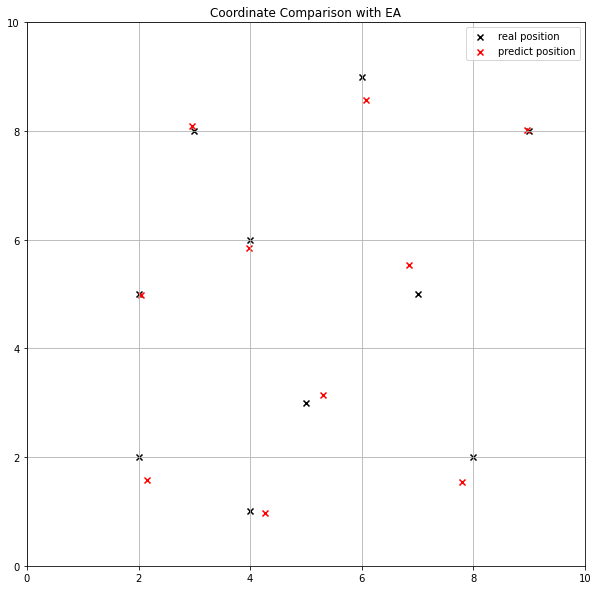

In [28]:
plt.figure(figsize=[10, 10])
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.title('Coordinate Comparison with EA')
# 画图-标准坐标
plt.scatter(l[:, 0], l[:, 1], c='black', marker='x', label='real position')
    
# 画图-预测坐标
plt.scatter(tmp[:, 0], tmp[:, 1], c='red', marker='x', label = 'predict position')
plt.legend()
plt.grid('True')
plt.savefig('./doc/compare_coordinate.jpg')

In [29]:
res.loc['GRU','MAE'] = mean_absolute_error(y02, pxy)
res.loc['GRU','RMSE'] = math.sqrt(mean_squared_error(y02, pxy))
res.loc['GRU','R2'] = r2_score(y02, pxy)
res.loc['GRU','TIME'] = end-start

## 查看统计结果并保存

In [30]:
res

,MAE,RMSE,R2,TIME
RNN,1.775772,2.138555,0.436643,0.009209
DNN,0.497220,0.654671,0.947249,0.005282
SVM,0.372712,0.459728,0.974035,0.018345
LSTM,0.241644,0.339661,0.985914,0.018288
GRU,0.188001,0.260423,0.991736,0.016743


In [31]:
res.to_csv('./doc/indictor.csv')